In [328]:
import perceptron as michael
import random
import time
import os
import math
import numpy as np
import re
import sys
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import tensorflow as tf
import keras
from keras import models, layers, losses, metrics, optimizers
import warnings
warnings.filterwarnings('ignore')

# (1)

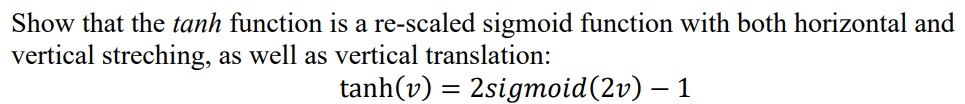

# (2)

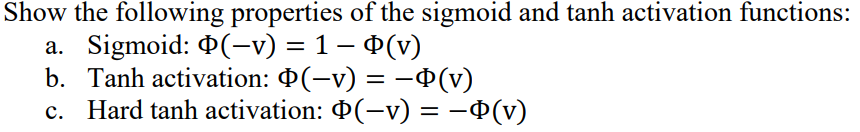

## a)

## b)

## c)

# (3)

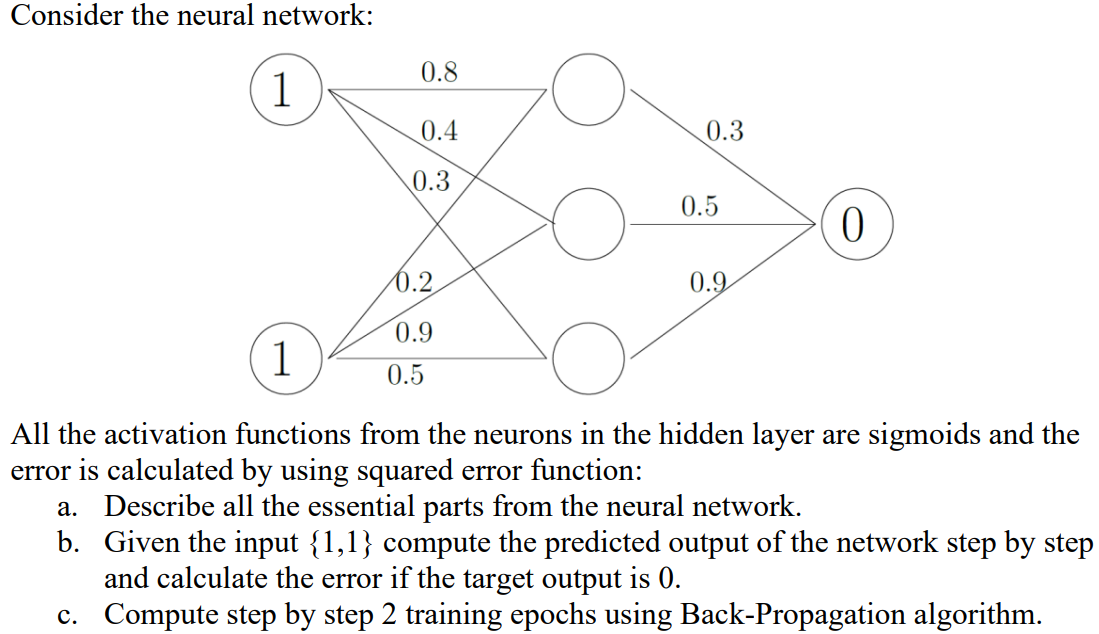

## a) The network has three layers where the first is the input layer, the second is a hidden layer with sigmoid as the activation function, and the last is the output layer (presumably also with sigmoid activation). Each layer is dense or fully connected. There is no bias added to any of the layers or nodes. This is a very simple network. This is a small MLP. There is no momentum or learning rate specified.

## b) computing output & error


In [158]:
inputNode1, inputNode2, targetNode = 1, 1, 0
inputWeights1 = [0.8, 0.4, 0.3]
inputWeights2 = [0.2, 0.9, 0.5]
hiddenWeights = [0.3, 0.5, 0.9]

#### Predicted Hidden Node 1 & error

In [161]:
p_hiddenNode1 = michael.sigmoid((inputNode1 * inputWeights1[0]) 
                                + (inputNode2 * inputWeights2[0]))
h1Error = michael.MSE(hiddenWeights[0], p_hiddenNode1)
p_hiddenNode1, h1Error

(0.7310585786300049, 0.18581149821052012)

##### change in weight

In [165]:
delta_h1Weight1, delta_h1Weight2 = h1Error * inputNode1, h1Error * inputNode2
delta_h1Weight1, delta_h1Weight2

(0.18581149821052012, 0.18581149821052012)

#### Predicted Hidden Node 2 & error

In [163]:
p_hiddenNode2 = michael.sigmoid((inputNode1 * inputWeights1[1]) 
                                + (inputNode2 * inputWeights2[1]))
h2Error = michael.MSE(hiddenWeights[1], p_hiddenNode2)
delta_weight1  = h1Error * inputNode1
p_hiddenNode2, h2Error

(0.7858349830425586, 0.08170163753093977)

##### change in weight

In [166]:
delta_h2Weight1, delta_h2Weight2 = h2Error * inputNode1, h2Error * inputNode2
delta_h2Weight1, delta_h2Weight2

(0.08170163753093977, 0.08170163753093977)

#### Predicted Hidden Node 3 & error

In [168]:
p_hiddenNode3 = michael.sigmoid((inputNode1 * inputWeights1[2]) 
                              + (inputNode2 * inputWeights1[2]))
h3Error = michael.MSE(hiddenWeights[2], p_hiddenNode3)
p_hiddenNode3, h3Error

(0.6456563062257954, 0.06469071456270638)

##### change in weight

In [169]:
delta_h3Weight1, delta_h3Weight2 = h3Error * inputNode1, h3Error * inputNode2
delta_h3Weight1, delta_h3Weight2

(0.06469071456270638, 0.06469071456270638)

### Predicted Output and Error

In [64]:
p_output = michael.sigmoid((p_hiddenNode1 * hiddenWeights[0]) 
                           + (p_hiddenNode2 * hiddenWeights[1]) 
                           + (p_hiddenNode3 * hiddenWeights[2]))
outputError = michael.MSE(targetNode, p_output)

(0.7673353425710626, 0.58880352795865)

## c) computing 2 epochs

In [31]:
learningRate = 0.1

### Epoch 1

In [ ]:
# inputNode1, inputNode2, targetNode = 1, 1, 0
# inputWeights1 = [0.8, 0.4, 0.3]
# inputWeights2 = [0.2, 0.9, 0.5]
# hiddenWeights = [0.3, 0.5, 0.9]

#### from above - feed forward (forward propagation) to hidden layer

In [72]:
p_hiddenNodes = [p_hiddenNode1, p_hiddenNode2, p_hiddenNode3]
hiddenError = [h2Error, h2Error, h3Error]

#### feed forward to output layer

In [ ]:
p_output = michael.sigmoid((p_hiddenNode1 * hiddenWeights[0]) 
                           + (p_hiddenNode2 * hiddenWeights[1]) 
                           + (p_hiddenNode3 * hiddenWeights[2]))
outputError = michael.MSE(targetNode, p_output)

In [79]:
prop1 = learningRate * michael.dSigmoid(p_output) * hiddenWeights[0]
prop2 = learningRate * michael.dSigmoid(p_output) * hiddenWeights[1]
prop3 = learningRate * michael.dSigmoid(p_output) * hiddenWeights[2]
[prop1, prop2, prop3]

[0.006495942665815074, 0.01082657110969179, 0.019487827997445223]

### Back propagating

In [41]:
prop1 = learningRate * michael.dSigmoid(outputNode) * hidden1
prop2 = learningRate * michael.dSigmoid(outputNode) * hidden2
prop3 = learningRate * michael.dSigmoid(outputNode) * hidden3
[prop1, prop2, prop3]

[0.006479150340245527, 0.010798583900409213, 0.019437451020736584]

In [13]:
1#x = 3.0999999999999996

1

# (4)

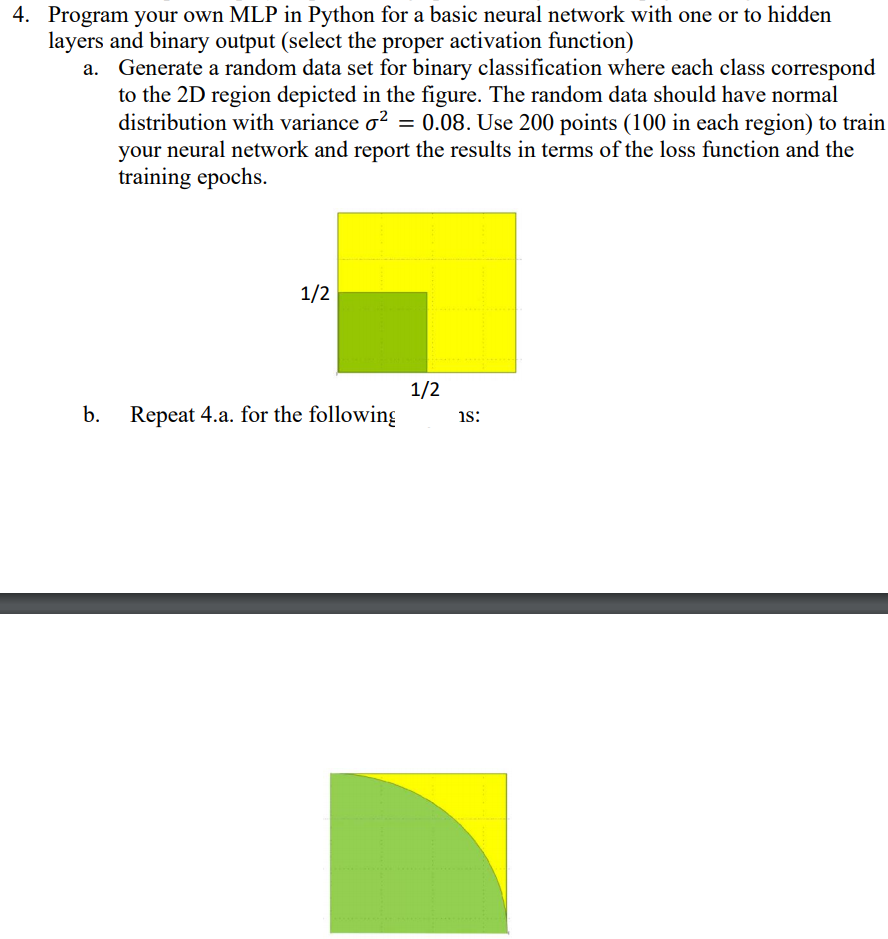

## a)

,0
0,-0.318640
1,1.642423
2,-0.246188
3,-0.101452
4,-1.739957
...,...
95,-0.229487
96,-0.443655
97,-0.329274
98,0.767365


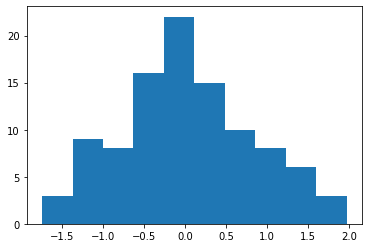

In [199]:
# dataset1 = np.random.choice([0, 1,], size=(500,500), p=[0.8, 1-0.8])
# dataset1 = np.random.normal(0, 1, 1000)
dataset1 =  0.8 * np.random.randn(100)
plt.hist(dataset1)
df = pd.DataFrame(dataset1)
df

In [248]:
dataset = []
numOfDataPoints = 1000
x = np.random.rand(numOfDataPoints)
y = np.random.rand(numOfDataPoints)
dataset.append(x)
dataset.append(y)
dataset = np.transpose(dataset)

array([0.62360099, 0.2871348 ])

In [201]:
df = pd.DataFrame(dataset)
df

,0,1
0,0.693470,0.770654
1,0.449114,0.223513
2,0.797381,0.739638
3,0.467989,0.408533
4,0.990015,0.718939
...,...,...
995,0.649093,0.417106
996,0.056031,0.905831
997,0.797155,0.578877
998,0.481840,0.482320


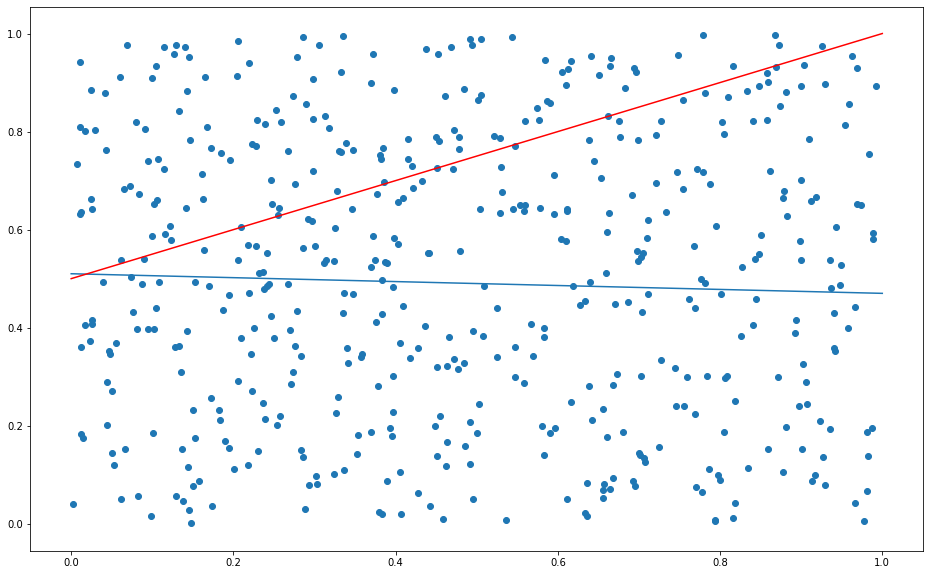

In [362]:
line = np.linspace(0.51, 0.47, 2)
slope = np.linspace(0, 1, 100)

a = 0.5 * slope + 0.5
# a1 = 0.69 * slope + 0.77
# print(sum(a)<sum(a1))
# print(sum(a<a1))

plt.figure(figsize=(16,10))
plt.scatter(x,y)

plt.plot(line)
plt.plot(slope, a, '-r')
# plt.plot(slope, a1, 'g')

In [319]:
labels = []
for i in range(len(dataset)):
    x0, y0 = dataset[i]
    a1 = x0 * slope + y0
    if sum(a<=a1) == 100:
        labels.append(1)
    else:
        labels.append(0)

In [325]:
x_train = dataset[:800]
y_train = labels[:800]

x_val = dataset[-200:]
y_val = labels[-200:]

In [326]:
# For this problem I believe we should use
# binary_crossentropy for loss
# sigmoid for activation in last layer

In [333]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(2,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [334]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])

In [340]:
history = model.fit(x_train,
                    y_train,
                    epochs=200,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Train on 800 samples, validate on 200 samples
Epoch 1/200
800/800 [==============================] - 0s 27us/step - loss: 0.4762 - acc: 0.9662 - val_loss: 0.4700 - val_acc: 0.9600
Epoch 2/200
800/800 [==============================] - 0s 16us/step - loss: 0.4636 - acc: 0.9600 - val_loss: 0.4579 - val_acc: 0.9550
Epoch 3/200
800/800 [==============================] - 0s 25us/step - loss: 0.4508 - acc: 0.9625 - val_loss: 0.4454 - val_acc: 0.9550
Epoch 4/200
800/800 [==============================] - 0s 16us/step - loss: 0.4388 - acc: 0.9600 - val_loss: 0.4336 - val_acc: 0.9500
Epoch 5/200
800/800 [==============================] - 0s 40us/step - loss: 0.4269 - acc: 0.9587 - val_loss: 0.4215 - val_acc: 0.9550
Epoch 6/200
800/800 [==============================] - 0s 37us/step - loss: 0.4142 - acc: 0.9650 - val_loss: 0.4089 - val_acc: 0.9450
Epoch 7/200
800/800 [==============================] - 0s 30us/step - loss: 0.4014 - acc: 0.9587 - val_loss: 0.3965 - val_acc: 0.9450
Epoch 8/200
800/

800/800 [==============================] - 0s 35us/step - loss: 0.1023 - acc: 0.9838 - val_loss: 0.1124 - val_acc: 0.9750
Epoch 62/200
800/800 [==============================] - 0s 36us/step - loss: 0.1017 - acc: 0.9825 - val_loss: 0.1084 - val_acc: 0.9800
Epoch 63/200
800/800 [==============================] - 0s 25us/step - loss: 0.0995 - acc: 0.9875 - val_loss: 0.1075 - val_acc: 0.9800
Epoch 64/200
800/800 [==============================] - 0s 25us/step - loss: 0.0976 - acc: 0.9875 - val_loss: 0.1070 - val_acc: 0.9900
Epoch 65/200
800/800 [==============================] - 0s 21us/step - loss: 0.0965 - acc: 0.9875 - val_loss: 0.1048 - val_acc: 0.9800
Epoch 66/200
800/800 [==============================] - 0s 27us/step - loss: 0.0954 - acc: 0.9838 - val_loss: 0.1039 - val_acc: 0.9750
Epoch 67/200
800/800 [==============================] - 0s 24us/step - loss: 0.0936 - acc: 0.9850 - val_loss: 0.1025 - val_acc: 0.9800
Epoch 68/200
800/800 [==============================] - 0s 32us/step

800/800 [==============================] - 0s 15us/step - loss: 0.0577 - acc: 0.9875 - val_loss: 0.0658 - val_acc: 0.9800
Epoch 122/200
800/800 [==============================] - 0s 26us/step - loss: 0.0579 - acc: 0.9875 - val_loss: 0.0652 - val_acc: 0.9800
Epoch 123/200
800/800 [==============================] - 0s 41us/step - loss: 0.0571 - acc: 0.9888 - val_loss: 0.0676 - val_acc: 0.9800
Epoch 124/200
800/800 [==============================] - 0s 25us/step - loss: 0.0570 - acc: 0.9888 - val_loss: 0.0661 - val_acc: 0.9800
Epoch 125/200
800/800 [==============================] - 0s 26us/step - loss: 0.0562 - acc: 0.9888 - val_loss: 0.0656 - val_acc: 0.9900
Epoch 126/200
800/800 [==============================] - 0s 26us/step - loss: 0.0567 - acc: 0.9862 - val_loss: 0.0655 - val_acc: 0.9800
Epoch 127/200
800/800 [==============================] - 0s 16us/step - loss: 0.0560 - acc: 0.9888 - val_loss: 0.0691 - val_acc: 0.9700
Epoch 128/200
800/800 [==============================] - 0s 17

800/800 [==============================] - 0s 39us/step - loss: 0.0437 - acc: 0.9937 - val_loss: 0.0512 - val_acc: 0.9900
Epoch 182/200
800/800 [==============================] - 0s 19us/step - loss: 0.0439 - acc: 0.9888 - val_loss: 0.0527 - val_acc: 0.9900
Epoch 183/200
800/800 [==============================] - 0s 24us/step - loss: 0.0432 - acc: 0.9925 - val_loss: 0.0507 - val_acc: 0.9900
Epoch 184/200
800/800 [==============================] - 0s 22us/step - loss: 0.0441 - acc: 0.9888 - val_loss: 0.0533 - val_acc: 0.9850
Epoch 185/200
800/800 [==============================] - 0s 24us/step - loss: 0.0435 - acc: 0.9913 - val_loss: 0.0560 - val_acc: 0.9700
Epoch 186/200
800/800 [==============================] - 0s 16us/step - loss: 0.0433 - acc: 0.9888 - val_loss: 0.0552 - val_acc: 0.9750
Epoch 187/200
800/800 [==============================] - 0s 20us/step - loss: 0.0434 - acc: 0.9888 - val_loss: 0.0501 - val_acc: 0.9900
Epoch 188/200
800/800 [==============================] - 0s 22

200/200 [==============================] - 0s 35us/step


In [342]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

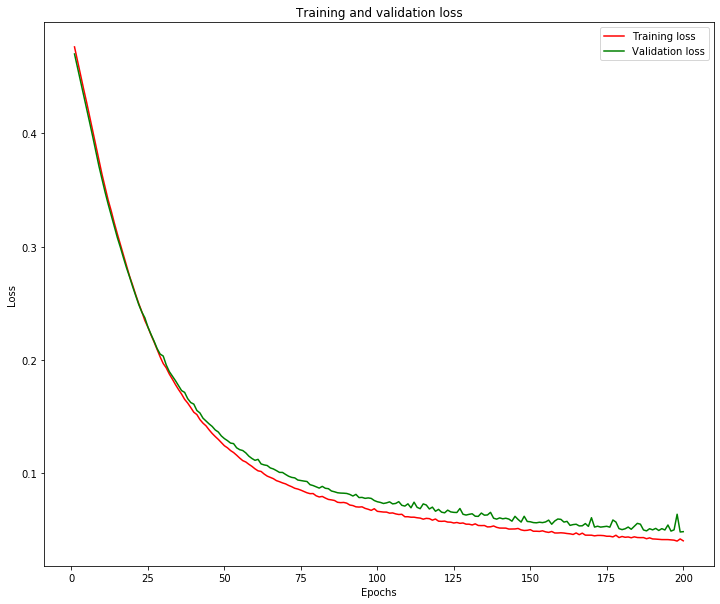

In [346]:
acc = history_dict['acc']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 10))
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Testing

In [359]:
x_test = []
numOfDataPoints = 500
x = np.random.rand(numOfDataPoints)
y = np.random.rand(numOfDataPoints)
x_test.append(x)
x_test.append(y)
x_test = np.transpose(x_test)

y_test = []
for i in range(len(x_test)):
    x0, y0 = x_test[i]
    a1 = x0 * slope + y0
    if sum(a<=a1) == 100:
        y_test.append(1)
    else:
        y_test.append(0)

In [360]:
results = model.evaluate(x_test, y_test)
results, model.metrics_names

500/500 [==============================] - 0s 34us/step


([0.03847036597132683, 0.992], ['loss', 'acc'])